---
title: "Лабораторна робота 1. Побудова простого лінійного бінарного класифікатора"
description:
  __Розпізнавання образів та комп'ютерний зір__
author: "&copy; [<span style='color: blue;'>Valeriy Sydorenko </span>](https://www.linkedin.com/in/valeriy-sydorenko-6782279a/), 2025"
date: "03.05.2025"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

**Мета**: реалізузвати найпростійший бінарний класифікатор засобами мови Python

::: callout-note
## Примітка
Попередньо опрацювати матеріали **Лекції 1**.
:::

## Що ви будете вміти?
* Познайомитеся з деякими можливостями бібліотеки `NumPy`
* Реалізувати простий лінійний класифікатор Розенблата мовою Python

## Короткі теоретичні відомості

### Бібліотека NumPy

[NumPy](https://numpy.org/), скорочено від Numerical Python, вже давно є наріжним каменем чисельних обчислень у Python. Він надає структури даних, алгоритми та бібліотечні зв'язки, необхідні для більшості наукових програм, що використовують числові дані у Python. NumPy містить, серед іншого:

* швидкий та ефективний об'єкт багатовимірного масиву ndarray;

* функції для виконання поелементних обчислень з масивами або математичних операцій між масивами;

* інструменти для читання та запису наборів даних на основі масивів на диск;

* операції лінійної алгебри, перетворення Фур'є та генерування випадкових чисел;

* досконалий C API, що дозволяє розширенням Python та власному коду на C або C++ отримувати доступ до структур даних та обчислювальних засобів NumPy.

Окрім можливостей швидкої обробки масивів, які NumPy додає до Python, одним з основних застосувань NumPy в аналізі даних і машинному навчанні є використання його як контейнера для даних, що передаються між алгоритмами та бібліотеками. Для числових даних масиви NumPy є більш ефективними для зберігання та маніпулювання даними, ніж інші вбудовані структури даних Python. Крім того, бібліотеки, написані мовою нижчого рівня, наприклад, C або FORTRAN, можуть працювати з даними, що зберігаються в масиві NumPy, без копіювання даних в інше представлення пам'яті. Таким чином, багато інструментів чисельних обчислень для Python або вважають масиви NumPy основною структурою даних, або орієнтовані на сумісність з NumPy.

Для інсталяції пакету потрібно виконати таку команду с консолі:

`conda install numpy`

### Постановка задачі бінарної класифікації

Розглянемо для простоти задачу двокласової класифікації.

In [1]:
print("Hello Nigga")

Hello Nigga


![*Рис. 4.5 До пояснення суті задачі двукласової класифікації у просторі двох ознак*](image 4/ris5.png)

Маємо набір вхідних векторів, кожен з яких буде має два вхідних значення, а вихідна (цільова) змінна приймати два дискретних значення:

$$
x_i=[x_{i1}, x_{i2}]^T, i=1, 2, ...
$$
$$
\begin{cases}
+1, & \text{якщо $x \in С_1$,} \\
-1, & \text{якщо $x \in С_2$.}
\end{cases}
$$



Уточнемо: якщо ми попадаємо у клас $C_1$, то мітка буде $+1$, інакше -- $C_2$. Задача полягає в знаходженні рівняння прямої лінії $a(x)=kx+b$, яка розділяє два класи.

Так виглядає постановка задачі бінарної класифікації.

### Розв'язання простої задачі бінарної класифікації 

Ідея розв'язання задачі розділення лінійно розділимих образів дуже проста: ми будемо для кожного вектора вхідних даних обчислювати скалярний добуток. Якщо його значення буде > нуля, значить точка знаходиться над розділяючою поверхнею, якщо менше -- точки знаходиться під нею (рис. 1.2).

![*Рис. 1.2*](image 4/ris8.png)

Для цього введемо знакову функцію


$$sign(x)=
\begin{cases}
-1, & \text{якщо $x<0$,} \\
+1, & \text{якщо $x>0$.}
\end{cases}
$$


Тоді

$a(x, \omega) = sign(\langle \omega, x \rangle).$

Якщо $\langle \omega, x \rangle) = 0$ -- відмова у класифікації.

Ключове питання: як шукати параметри розділяючої гіперплощини $\omega = [\omega_0, \omega_1, \omega_2]^T$?

Унашому випадку це пряма лінія $\omega = [\omega_0, \omega_1]^T$.

Розглянемо задачу класифікації гусениць і божих корівок:

**Таблиця 1.1:** *Дані про жуків*

| № | Ширина | Довжина | Жук |
|------|------|------|------|
| 1    | 10    | 50    |гусениця |
| 2    | 20    | 30   | божа корівка|
| 3    | 25   | 30  | божа корівка|
| 4    | 20   | 60   | гусениця|
| 5    | 15   | 70    | гусениця|
| 6    | 40   | 40   | божа корівка|
| 7    | 30   | 45   | божа корівка|
| 8    | 20   | 45   | гусениця|
| 9    | 40   | 30   | божа корівка|
| 10    | 7    | 35    | гусениця|


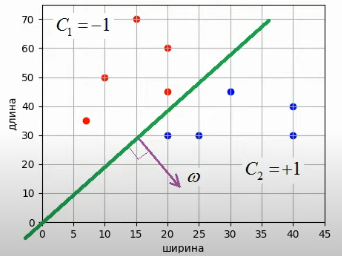

У нашому випадку чітко видно, що дані утворюють лінійно роздільні класи і роздільну лінію можна провести через початок координат.  Її рівняння можна записати просто:

$\omega_1 x_1 + \omega_2 x_2 = 0$, 

або 

$x_2 = - \frac{\omega_1}{\omega_2} x_1.$

Якщо для простоти взяти $\omega_2 = -1$, то

$x_2 = \omega_1 x_1.$

і задача зводиться до пошуку єдиного параметра

$\omega = [\omega_1, -1]^T.$

Таку задачу розв'язував свого часу Френк Розенблатт (1928-1971), який увів критерій якості для розділяючої лінії як кількість випадків неправильної класифікації:

$Q(a, X^l) = \sum_{i=1}^l \Big[a(x_i \ne y_i)\Big]$,

де вираз $\Big[a(x_i \ne y_i)\Big]$ називається *нотацією Айзерсона* і повертає $1$ або $0$.

З урахуванням того, що $y \in \{-1, +1\}$, функціонал якості можна переписати як

$Q(a, X^l) = \sum_{i=1}^l \Big[ a(x_i) \cdot y_i < 0\Big]$, тобто, якщо класифікація виконана неправильно, то маємо $y_i \cdot a(x_i)  < 0$.

Вираз $M_i = a(x_i) \cdot y_i$ називають *відступом (margin)* і часто використовується на практиці.

Важливо зазначити, що з урахуванням того, що $a(x) = \langle \omega, x \rangle$, то відступ ще й показує відстань від розділюячої гіперплощини.

Таким чином задача зводиться до пошуку оцінки параметра $\mathbf\omega$, яка мінімізує функціонал

$Q(a, X^l) = \sum_{i=1}^l \Big[M_l < 0\Big] \rightarrow min$

Однак, цей функціонал представляє собою кусочно-неперервну функцію, яка не дифернціюється, тому застосувати градієнтний метод для його мінімізації не є можливим. Пізніше ми покажемо, як обійти цю проблему. Водночас, можна запропонувати суто алгоритмічний підхід для розв'язання задачі, який свого часу запропонував Ф. Розенблатт.

* **Вхід:** вибірка $X^l$, шаг навчання $\eta$, максимальна кількість ітерацій $N$
* **Вихід:** вектор ваг $\omega = [\omega_1, \omega_2]^T$
1. ініціалізація $\omega = [0, =1]^T$
2. повторювати $N$ разів
3. \|_по черзі вибирати $x_i, y_i$ з навчальної вибірки $X^l$
4. ||___якщо $M_i = sign(\langle \omega, x_i \rangle) \cdot y_i < 0.$
5. ||_______корегувати вагу: $\omega_1 = \omega_1 + \eta \cdot y_i$
6. \|_обчислюємо показник якості $Q(a, X^l) = \sum_{l=1}^l \Big[M_l < 0\Big]$
7. \|_якщо $Q(a, X^l) = 0$, то цикл припиняється (розв'язок знайдено)

Нижче наведено реалізацію цього алгоритма на Python.

[1.6000000000000003, -1]


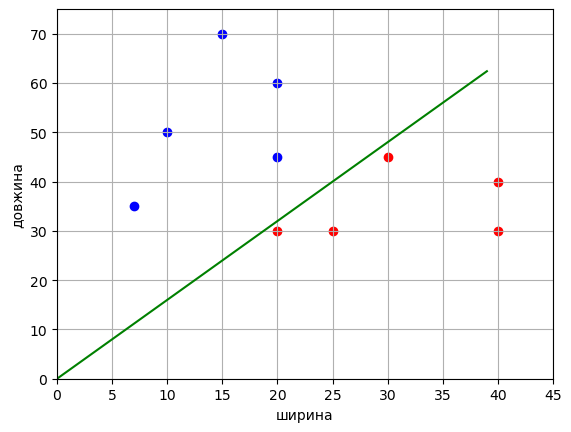

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)                          # розмір навчальної вибірки
w = [0, -1]                                     # початкове значення вектора w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # правило класифікації
N = 50                                          # максимальна кількість ітерацій
L = 0.1                                         # крок зміни ваги
e = 0.1                                         # невелике додаток до w0, щоб забезпечити зазор між лінією розділення та областю

last_error_index = -1                           # індекс останньої помилкової спостереження

for n in range(N):
    for i in range(n_train):                # ітерація по спостереженням
        if y_train[i]*a(x_train[i]) < 0:    # якщо помилка класифікації,
            w[0] = w[0] + L * y_train[i]    # то коригування ваги w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показник якості класифікації (кількість помилок)
        break       # зупинка, якщо всі класифікуються правильно

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

line_x = list(range(max(x_train[:, 0])))    # створення графіка роздільної лінії
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для 1-го
x_1 = x_train[y_train == -1]                # і 2-го класів

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()


## Завдання для самостійної роботи 

1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
1. Побудувати бінарний класифікатор і вивести результати бінарної класифікації на графіку.
1. Дати відповіді на контрольні запитання.
1. Відправити результати роботи у файлі lab_1_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Які основні принципи лежать в основі розпізнавання образів у контексті машинного навчання?
1. Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів?
1. Зформулювати постановку  задачі бінарної класифікації.
1. Що таке рівняння гіперплощини і як воно використовується для розв'язання задачі бінарної класифікації?
1. Наведіть кроки для розв'язання простої задачі бінарної класифікації за допомогою машинного навчання.

### Варіанти індивідульних завдань

In [14]:
import numpy as np

# Створення першого варіанту даних
x_train_1 = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train_1 = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Створення додаткових варіантів даних
additional_datasets = []

for i in range(2, 16):
    x_train_additional = np.random.randint(5, 51, size=(10, 2))
    y_train_additional = np.random.choice([-1, 1], size=10)
    
    # Видалення перетину з першим варіантом
    intersect_indices = np.where(np.isin(x_train_additional, x_train_1).all(axis=1))[0]
    if len(intersect_indices) > 0:
        x_train_additional = np.delete(x_train_additional, intersect_indices, axis=0)
        y_train_additional = np.delete(y_train_additional, intersect_indices)
    
    additional_datasets.append((x_train_additional, y_train_additional))

# Виведення всіх даних
print("Перший варіант:")
print("x_train_1:")
print(x_train_1)
print("y_train_1:")
print(y_train_1)
print()

for i, (x_train_additional, y_train_additional) in enumerate(additional_datasets, start=2):
    print(f"Варіант {i}:")
    print(f"x_train_{i}:")
    print(x_train_additional)
    print(f"y_train_{i}:")
    print(y_train_additional)
    print()


Перший варіант:
x_train_1:
[[10 50]
 [20 30]
 [25 30]
 [20 60]
 [15 70]
 [40 40]
 [30 45]
 [20 45]
 [40 30]
 [ 7 35]]
y_train_1:
[-1  1  1 -1 -1  1  1 -1  1 -1]

Варіант 2:
x_train_2:
[[17 29]
 [44 12]
 [47  7]
 [18 17]
 [30 36]
 [ 6 10]
 [38  6]
 [10 38]
 [41 10]
 [42 10]]
y_train_2:
[ 1  1  1 -1  1  1 -1 -1  1 -1]

Варіант 3:
x_train_3:
[[33  5]
 [37 40]
 [ 5 23]
 [ 9 15]
 [16 46]
 [33 43]
 [ 9 50]
 [ 8 21]
 [38 11]
 [47  9]]
y_train_3:
[ 1 -1  1  1  1  1  1  1 -1  1]

Варіант 4:
x_train_4:
[[20 23]
 [38 14]
 [42  7]
 [28 41]
 [ 9 10]
 [37 34]
 [22 12]
 [48 32]
 [22 10]
 [23 41]]
y_train_4:
[ 1  1 -1  1  1 -1  1  1 -1  1]

Варіант 5:
x_train_5:
[[28 14]
 [22 13]
 [24 22]
 [ 6 34]
 [11 22]
 [38 20]
 [33 17]
 [39 35]]
y_train_5:
[ 1 -1 -1  1  1 -1  1  1]

Варіант 6:
x_train_6:
[[28 31]
 [50 32]
 [17 36]
 [34 34]
 [28  6]
 [31 43]
 [ 7  8]
 [27 25]
 [34 34]
 [22 42]]
y_train_6:
[-1  1 -1  1  1  1  1  1 -1  1]

Варіант 7:
x_train_7:
[[23 31]
 [25 22]
 [32 11]
 [ 8 34]
 [24 31]
 [ 9 37]
 

## References

1. [Машинное обучение. Вводная лекция. К.В. Воронцов, Школа анализа данных, Яндекс.](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=2)
1. [#1. Что такое машинное обучение? Обучающая выборка и признаковое пространство | Машинное обучение](https://www.youtube.com/watch?v=Md8RW6tKCNg)
1. [NumPy](https://numpy.org)
1. [NumPy](https://wesmckinney.com/book/preliminaries)